In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df_m = pd.read_csv('df_m.csv')
series_data = df_m.iloc[1509]

df = pd.DataFrame({'Value': series_data})
df.index = pd.to_datetime(df.index, format='%Y%m')
df['Value'] += 0.00000001
df.head()

,Value
2004-10-01,0.998333
2004-11-01,0.948056
2004-12-01,0.976667
2005-01-01,0.988611
2005-02-01,0.998056


<Figure size 640x480 with 0 Axes>

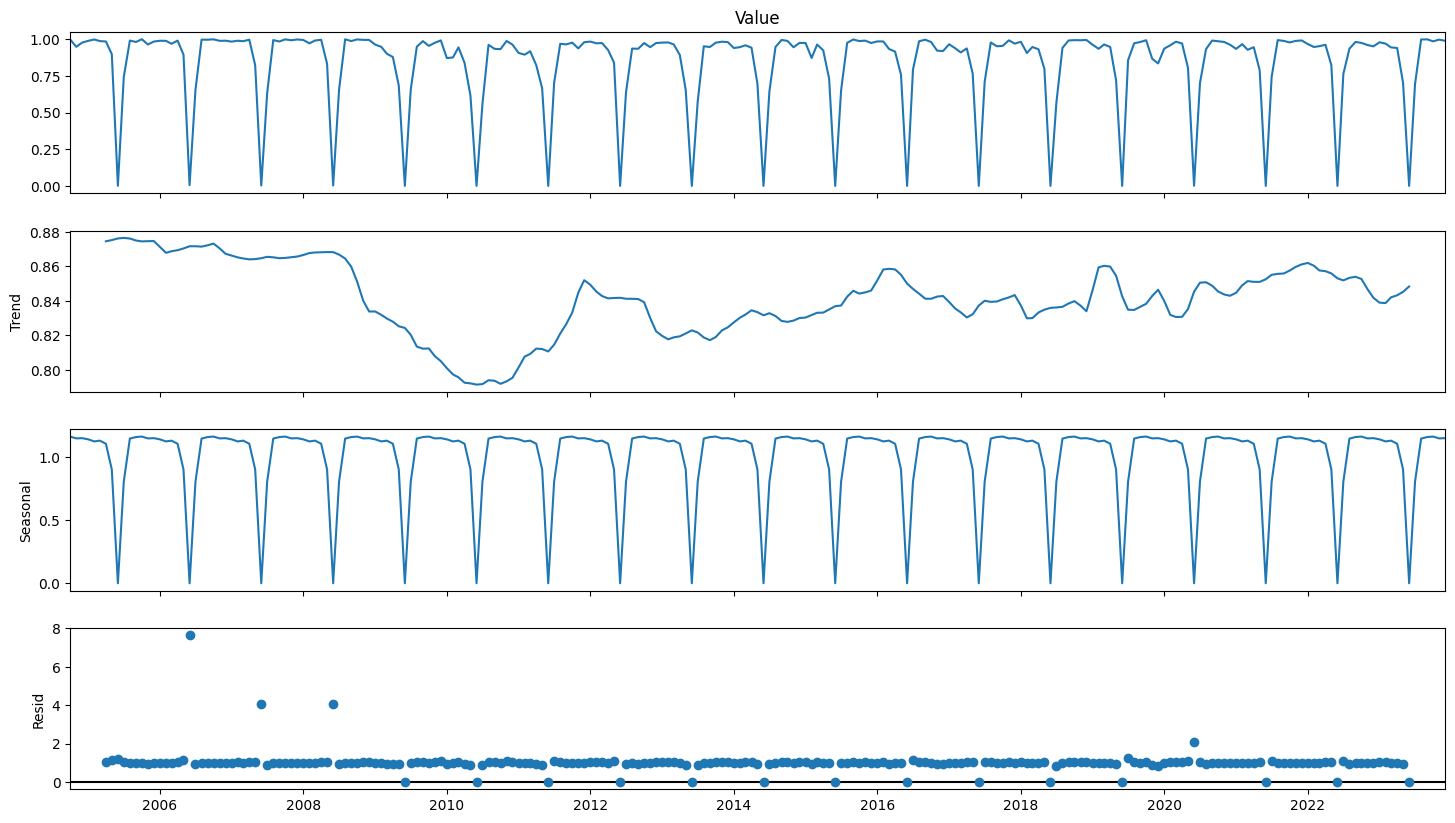

In [6]:
result = seasonal_decompose(df['Value'], model='multiplicative', period=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

In [7]:
test_size = 0.15
valid_size = 0.10
test_split_idx = int(df.shape[0] * (1 - test_size))
valid_split_idx = int(df.shape[0] * (1 - (valid_size + test_size)))


In [8]:
train_df = df.iloc[:valid_split_idx].copy()
valid_df = df.iloc[valid_split_idx:test_split_idx].copy()
test_df = df.iloc[test_split_idx:].copy()

y_train = train_df['Value']
y_valid = valid_df['Value']
y_test = test_df['Value']

In [9]:
arima_model = auto_arima(y_train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
sarima_model = auto_arima(y_train, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
y_test_pred_arima = arima_model.predict(n_periods=len(y_test))
y_test_pred_sarima = sarima_model.predict(n_periods=len(y_test))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=451.181, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=83.608, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=292.366, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=83.095, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=69.900, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=66.906, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=64.866, Time=0.15 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=9.276, Time=0.18 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=11.709, Time=0.08 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-15.609, Time=0.35 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-12.222, Time=0.32 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-9.963, Time=0.33 sec
 AR

In [10]:
mae_arima = mean_absolute_error(y_test, y_test_pred_arima)
mse_arima = mean_squared_error(y_test, y_test_pred_arima)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(y_test, y_test_pred_arima)

In [11]:
mae_sarima = mean_absolute_error(y_test, y_test_pred_sarima)
mse_sarima = mean_squared_error(y_test, y_test_pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(y_test, y_test_pred_sarima)

In [12]:
print("Performance measures for ")
print("ARIMA:")
print(f"MAE: {mae_arima:.4f}, MSE: {mse_arima:.4f}, RMSE: {rmse_arima:.4f}, R²: {r2_arima:.4f}")
print("SARIMA:")
print(f"MAE: {mae_sarima:.4f}, MSE: {mse_sarima:.4f}, RMSE: {rmse_sarima:.4f}, R²: {r2_sarima:.4f}")

Performance measures for 
ARIMA:
MAE: 0.1850, MSE: 0.0737, RMSE: 0.2714, R²: 0.0161
SARIMA:
MAE: 0.1698, MSE: 0.0958, RMSE: 0.3096, R²: -0.2801


In [19]:
n_last = 6
y_last_arima_pred = arima_model.predict(n_periods=n_last)
y_last_sarima_pred = sarima_model.predict(n_periods=n_last)
y_actual_last = df['Value'].iloc[-n_last:]

In [20]:
mae_last_arima = mean_absolute_error(y_actual_last, y_last_arima_pred)
mse_last_arima = mean_squared_error(y_actual_last, y_last_arima_pred)
rmse_last_arima = np.sqrt(mse_last_arima)
r2_last_arima = r2_score(y_actual_last, y_last_arima_pred)

In [21]:
mae_last_sarima = mean_absolute_error(y_actual_last, y_last_sarima_pred)
mse_last_sarima = mean_squared_error(y_actual_last, y_last_sarima_pred)
rmse_last_sarima = np.sqrt(mse_last_sarima)
r2_last_sarima = r2_score(y_actual_last, y_last_sarima_pred)

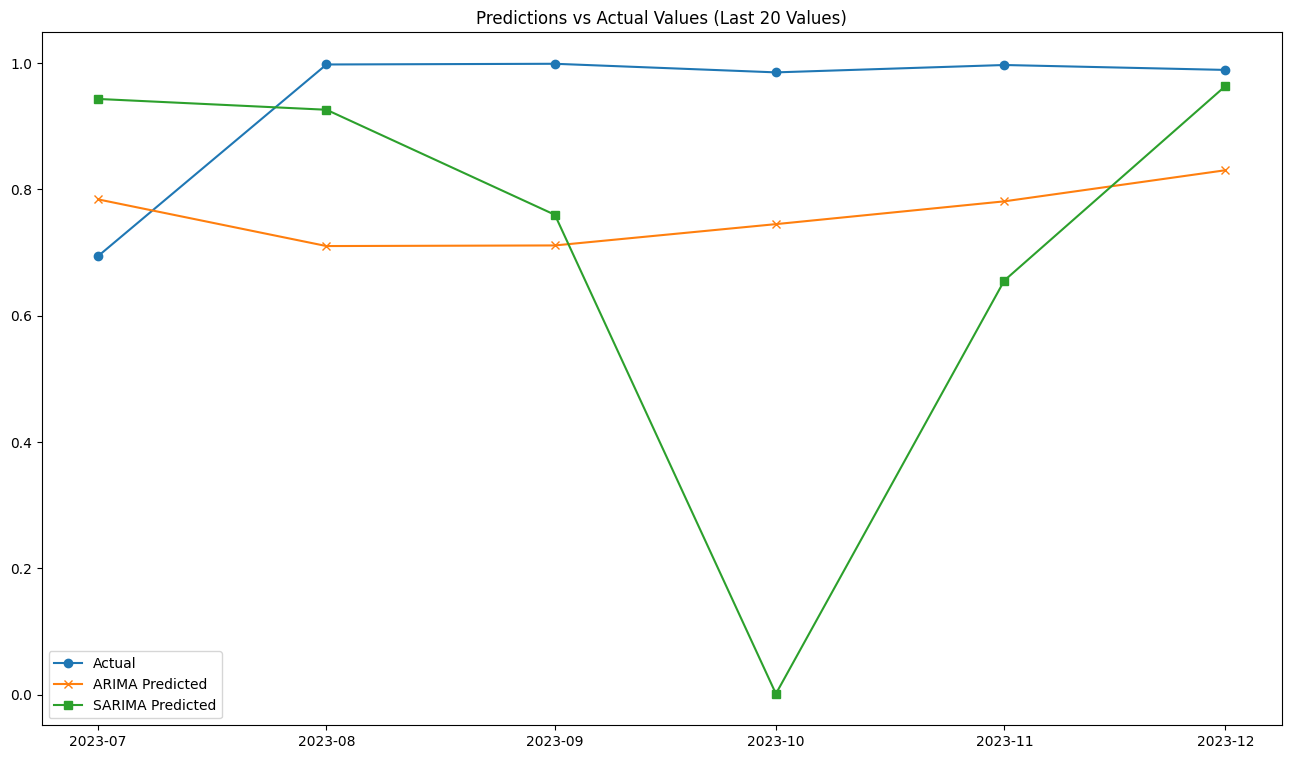

In [22]:
plt.figure(figsize=(16, 9))
plt.plot(df.index[-n_last:], y_actual_last, label='Actual', marker='o')
plt.plot(df.index[-n_last:], y_last_arima_pred, label='ARIMA Predicted', marker='x')
plt.plot(df.index[-n_last:], y_last_sarima_pred, label='SARIMA Predicted', marker='s')
plt.legend()
plt.title('Predictions vs Actual Values (Last 20 Values)')
plt.show()

In [23]:
print("Performance measures for the last 20 values:")
print("ARIMA:")
print(f"MAE: {mae_last_arima:.4f}, MSE: {mse_last_arima:.4f}, RMSE: {rmse_last_arima:.4f}, R²: {r2_last_arima:.4f}")
print("SARIMA:")
print(f"MAE: {mae_last_sarima:.4f}, MSE: {mse_last_sarima:.4f}, RMSE: {rmse_last_sarima:.4f}, R²: {r2_last_sarima:.4f}")

Performance measures for the last 20 values:
ARIMA:
MAE: 0.2133, MSE: 0.0505, RMSE: 0.2247, R²: -3.0527
SARIMA:
MAE: 0.3183, MSE: 0.2015, RMSE: 0.4488, R²: -15.1750
